In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('data/FIFA 2018 Statistics.csv')

y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

[Tutorial](https://graphviz.org/download/) install graphviz

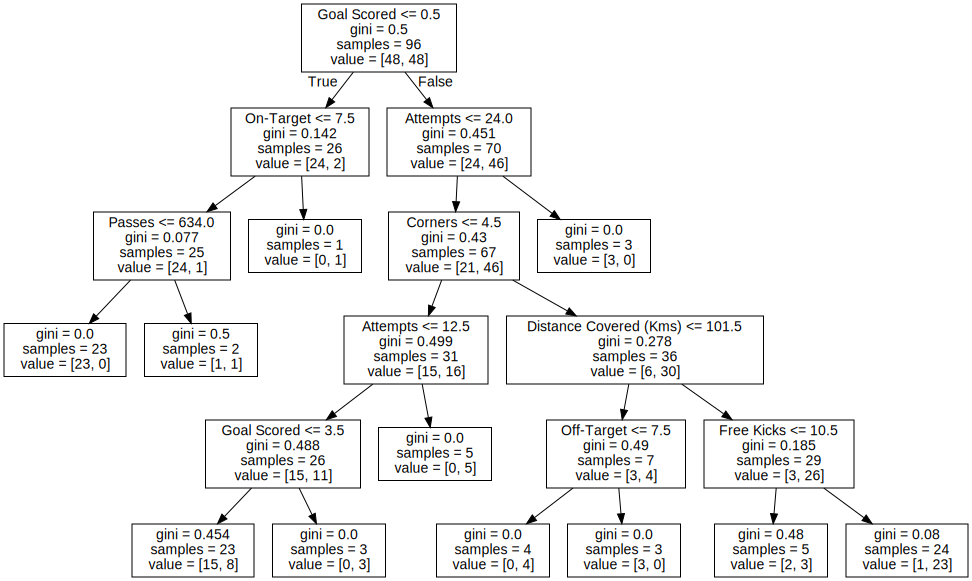

In [5]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

As guidance to read the tree:

- Leaves with children show their splitting criterion on the top
- The pair of values at the bottom show the count of False values and True values for the target respectively, of data points in that node of the tree.

Here is the code to create the Partial Dependence Plot using the [PDPBox library](https://pdpbox.readthedocs.io/en/latest/).

In [9]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [8]:
! pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 28.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.0 MB/s eta 0:00:0000:0100:01
Using legacy 'setup.py install' for pdpbox, since package 'wheel' is not installed.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
  Running setup.py install for pdpbox ... done


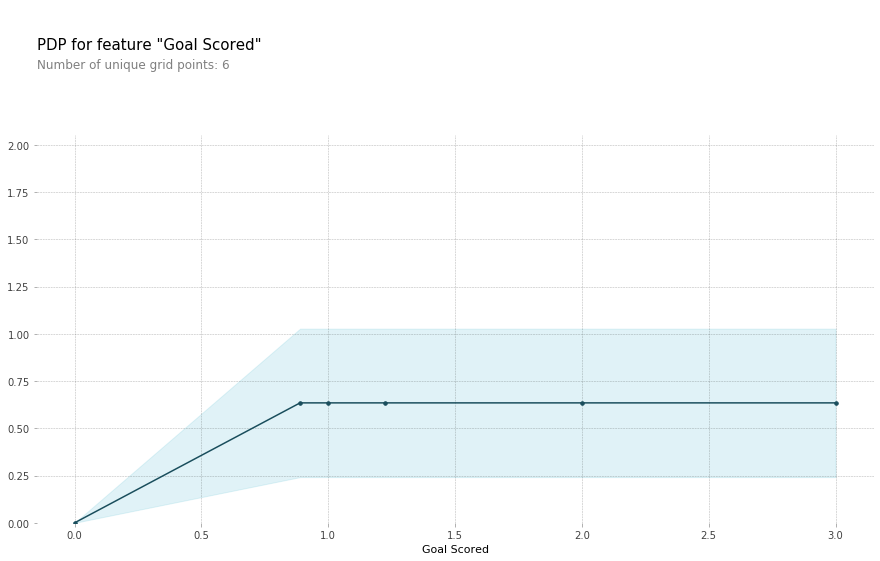

In [11]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')
# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

- The **y axis** is interpreted as **change in the predictions** from what it would be predicted at the baseline or leftmost value
- A blue shaded area indicates the **level of confidence**

From the plot presented to us, we can see that scoring one goal can substantially increase your changes of winning "Man of the Match". But more goals than that appear to have little impact.

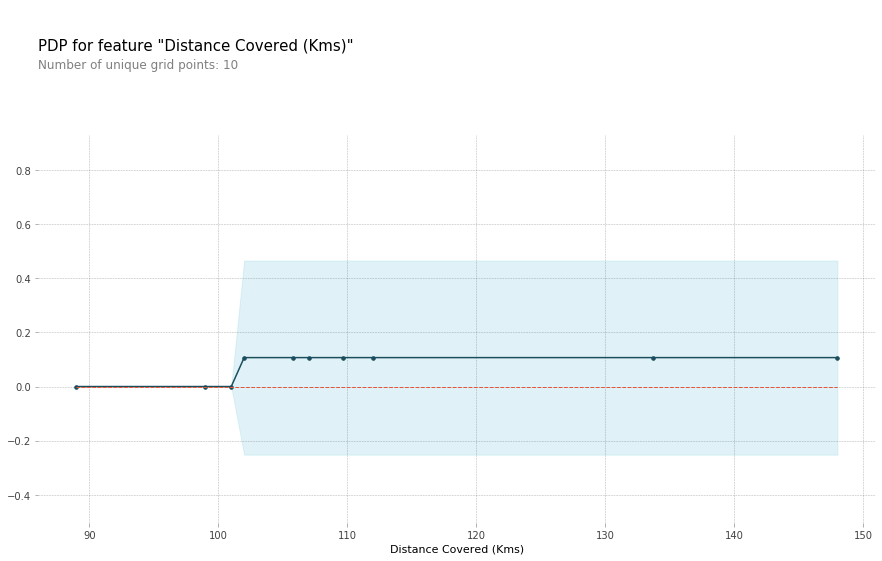

In [12]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

- You should be able to see from the decision tree above that this is representing exactly the model's structure

You can easily compare the structure or implications of different models. Here is the same plot with a Random Forest model.

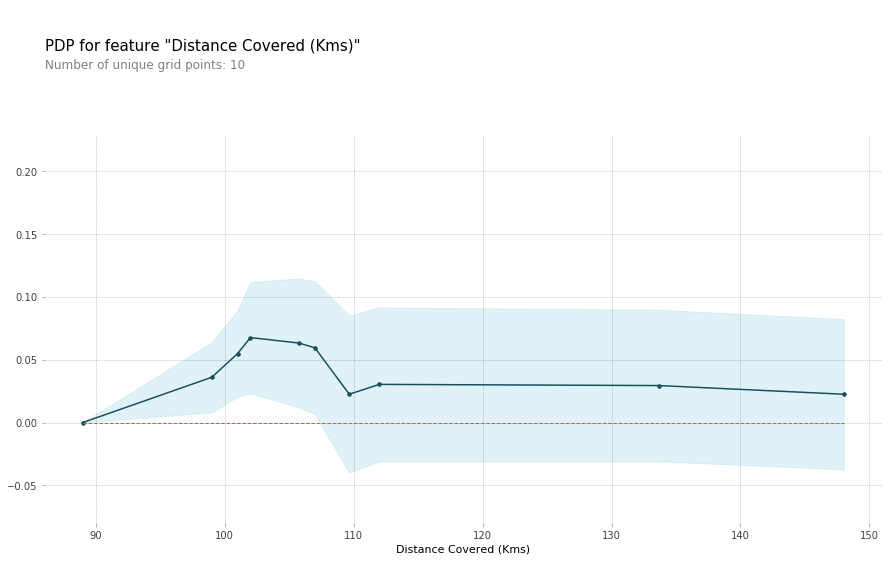

In [14]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

This models assumes that you are more likely to win "Man of the Match" if your players run a total of 100km over the course of the game. Althought, running much more causes lower predictions.

### 2D Partial Dependence Plots

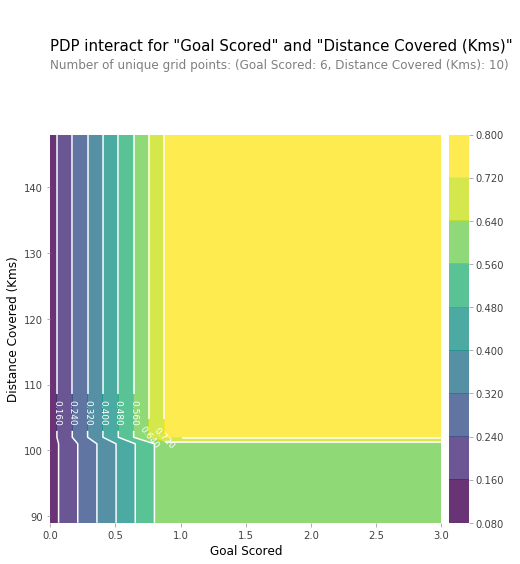

In [15]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

- This graph shows predictions for any combination of Goals Scored and Distance covered.

For example, we see the highest predictions when a team scores at least 1 goal and run a total distance close or higher than 100km. If they score 0 goals, distance covered doesn't matter.